In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### Будем работать с данными по приложениям из Google Play.

In [18]:
apps_google_play = pd.read_csv(
    'googleplaystore.csv'
)

apps_google_play = apps_google_play.dropna() #убрали пустые строки. Их было не очень много

### Общий вид таблицы с полученной информацией

In [19]:
apps_google_play.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Распределение поставленных оценок

В данном примере проверяем, как пользователи в целом относятся к приложениям на Google play.
Исходя из данной информации можно судить о том, что качество приложений в целом на данной площадке хорошее.
Также это может говорить о том, что поиск и система рекомендаций (если она есть) работают хорошо, так как пользователи очень редко разочаровываются в приложениях и ставят низкие оценки.
Средняя оценка варьируется в районе 4,3, что само по себе очень хорошо.
Также заметны аномальные пробелы, что само по себе странно.

Text(0, 0.5, 'Количество оценок')

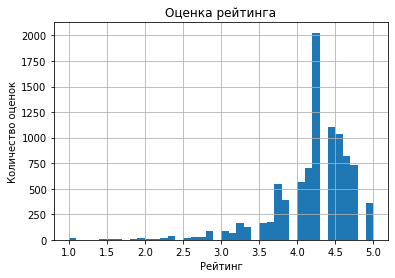

In [26]:
rates = apps_google_play.Rating.hist(bins=40)
rates.set_title('Оценка рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')

### Проверка общего количества приложений по категориям

Больше всего приложений в маркете присутствует из категории "Семья", после нее, ожидаемо идут игры, но с большим отставанием. Хотя, как мы увидим дальше, количество и качество два разных понятия.
Но, как для разработчика программы, стоит задумать о том, чтобы не делать приложения для категория "Семья", а если и делать, то совсем уникальное и с какими оригинальными функциями. Также можно изучить приложения конкурентов, которых очень много. Можно также посмотреть более глубже и уже распределить все еще дополнительно по жанрам.

Text(0.5, 1.0, 'Количество приложений по категориям')

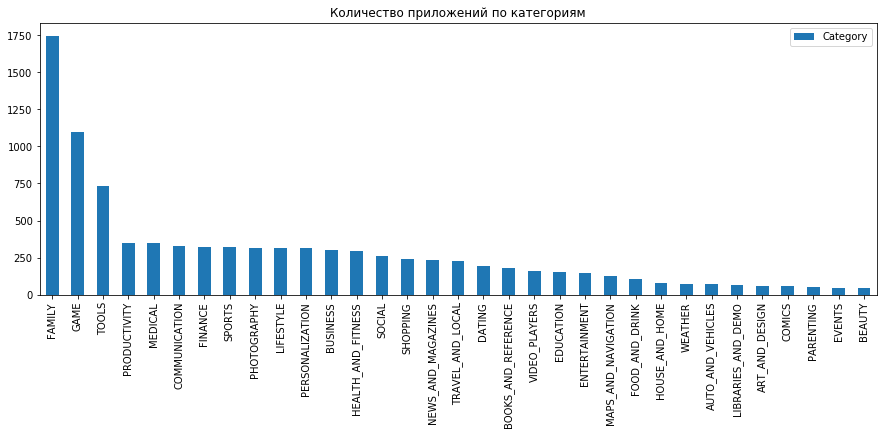

In [21]:
total_category = apps_google_play['Category'].value_counts()

tst = pd.DataFrame(total_category)
app_by_category = tst.plot(kind='bar', rot=90, figsize=(15,5))
app_by_category.set_title('Количество приложений по категориям')

### Соотношение платных и бесплатных программ

Наглядно видно, что процент платных программ крайне мал и при разработке необходимо будет это учесть и тем самым или просто бесплатное приложение, или сдеать условно-бесплатное приложение с дополнительных платным функционалом, чтобы не отпугнуть избалованных пользователей, которым полюбились бесплатные приложения, ценой.

Text(0.5, 1.0, 'Количество платных и бесплатных приложений')

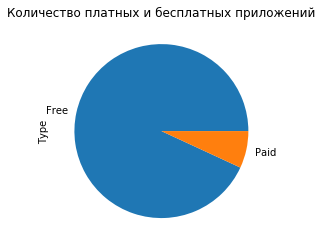

In [22]:
free_paid = apps_google_play['Type'].value_counts()    
free_apps = free_paid.plot(kind='pie')
free_apps.set_title('Количество платных и бесплатных приложений')

### Отзывы

Как видно на графике, больше всего отзывов как раз у игр, хотя по количеству приложений в Google store они сильно уступали категории "Семья". В данном случае можно сделать выводы, что даже при в разы меньшем количестве игр их скачивают на порядок чаще, плюс они, скорее всего" бесплатно раздаются и судя по рейтингу многие остаются довольных их качеством.

In [12]:
apps_google_play['Reviews'] = apps_google_play.Reviews.astype('int64')

In [13]:
top_developers_df = apps_google_play.groupby('Category')[['Reviews']].sum()\
    .sort_values('Reviews', ascending=False)

In [14]:
top_developers_df.style.bar()

,Reviews
Category,
GAME,1585419577
COMMUNICATION,815461799
SOCIAL,621241091
FAMILY,410222902
TOOLS,273180158
PHOTOGRAPHY,213516607
SHOPPING,115041033
PRODUCTIVITY,114116717
VIDEO_PLAYERS,110379692
